
# Analyzing the Housing Crisis using FHFA House Price Index Data
Ukeje Okoronkwo and Inigo Capinpin


## Introduction

Welcome to this data science tutorial where we will delve into the recent housing crisis in the United States through the lens of data analysis. In this project, we will utilize the Federal Housing Finance Agency (FHFA) House Price Index dataset to examine the impact of the housing crisis on the U.S. housing market and explore the factors that contributed to this economic down turn.

##e Motiv

The late 2000s housing crisis had a devastating impact on the U.S. economy, leading to widespread foreclosures, plummeting home values, and a ripple effect across various sectors. This crisis exposed the vulnerabilities and interconnectedness of the housing mark , and the broader economic landscape. Understanding the intricate dynamics of the housing market during this turbulent period is crorial f , etsnomis , and individuals seeking to make informed decisions about housing investments and policies. By analyzing the factors that contributed to the crisis, policymakers can develop more robust regulations and safeguards to prevent similar events from occurring. Investors and homebuyers can gain valuable lessons on assessing risks and navigating market fluctuations. Furthermore, studying the patterns, trends, and indicators that emerged during the crisis can aid in the development of forecasting models and early warning systems, enabling proactive measures to mitigate the impacts of futuis pcrisee.olicies.


For this analysis, we will be utilizing the FHFA House Price Indexacdataset, e resource that provides valuable insights into the dynamics of the U.S. housing market. This dataset offers a measure of house price changes across various geographic regions, enabling us to examine the intricate patterns and trends within the housing market at different levels of granularity.

The dataset consists of several columns, each representing a specific region or index. Let's delve into the meaning of these terms:

1. **DV_ENC**: This column represents the house price index for the East North Central region, comprising states such as Illinois, Indiana, Michigan, Ohio, and Wisconsin.

2. **DV_ESC**: The East South Central region is represented by this column, encompassing states like Alabama, Kentucky, Mississippi, and Tennessee.

3. **DV_MA**: This column reflects the house price index for the Middle Atlantic region, which includes states such as New Jersey, New York, and Pennsylvania.

4. **DV_MT**: The Mountain region is represented by this column, covering states like Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming.

5. **DV_NE**: This column represents the house price index for the New England region, comprising states like Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont.

6. **DV_PAC**: The Pacific region is represented by this column, encompassing states like Alaska, California, Hawaii, Oregon, and Washington.

7. **DV_SA**: This column reflects the house price index for the South Atlantic region, which includes states such as Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, and West Virginia.

8. **DV_WNC**: The West North Central region is represented by this column, covering states like Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota.

9. **DV_WSC**: This column represents the house price index for the West South Central region, comprising states like Arkansas, Louisiana, Oklahoma, and Texas.

10. **USA**: This column represents the national house price index for the entire United States, providing an overall perspective on the housing market dynang crisis in the late 2000s.granularities.

## Data Collection

To begin our analysis, we need to collect the necessary data. We will be using the FHFA House Price Index dataset, which can be downloaded from the FHFA website. The dataset is available in CSV format, making it easy to import and work with in Python.

Here are the steps to collect the data:

1. Visit the FHFA House Price Index dataset page: [FHFA House Price Index Dataset](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx)
2. Download the "All-Transactions Indexes (Estimated using Sales Prices and Appraisal Data)" dataset in CSV format.
3. Save the downloaded CSV file in the `data` directory of your project repository.

## Imports

To work with the data and perform our analysis, we will be using several Python libraries. Heromplexities of the housing crisis using the power of data analysis!he housing crisis through the power of data science!


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.decomposition import PCA


These libraries provide various functionalities for data manipulation, visualization, statistical analysis, and machine learning.

## Data Preprocessing

Once we have collected the data, we will proceed to the data preprocessing stage. In this stage, we will perform tasks such as handling missing values, formatting the data, and selecting relevant features for analysis.


In [2]:
data = pd.read_csv("HPI_AT_us_and_census.csv")
# or if the data is already in a DataFrame:
# data = your_dataframe

After reading in the data we need to create the columns for the data as right now there are none

In [3]:
data.columns = ['region', 'year', 'quarter', 'price_index']

Check the first few rows of the DataFrame to get an idea of the data structure

In [4]:
display(data.head())

,region,year,quarter,price_index
0,DV_ENC,1975,2,62.65
1,DV_ENC,1975,3,63.56
2,DV_ENC,1975,4,65.01
3,DV_ENC,1976,1,65.07
4,DV_ENC,1976,2,66.96


Check the shape of the DataFrame to see the number of rows and columns

In [5]:
display(data.shape)

(1959, 4)

Check the data types of each column

In [6]:
display(data.dtypes)

region          object
year             int64
quarter          int64
price_index    float64
dtype: object

Check for missing values

In [7]:
display(data.isnull().sum())

region         0
year           0
quarter        0
price_index    0
dtype: int64

Rename the columns to more meaningful names

In [8]:
data = data.rename(columns={0: 'region', 1: 'year', 2: 'quarter', 3: 'price_index'})

Convert the 'year' and 'quarter' columns to integer data type

In [9]:
data['year'] = data['year'].astype(int)
data['quarter'] = data['quarter'].astype(int)

Create a new 'date' column by combining the 'year' and 'quarter' columns (Ignore warning if seen)

In [10]:
data['date'] = pd.to_datetime(data['year'].astype(str) + 'Q' + data['quarter'].astype(str))

C:\Users\uk273\AppData\Local\Temp\ipykernel_6908\3016304957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['year'].astype(str) + 'Q' + data['quarter'].astype(str))


Drop the original 'year' and 'quarter' columns if they are no longer needed

In [11]:
data = data.drop(['year', 'quarter'], axis=1)

Group the data by region and resample it to a desired frequency (e.g., quarterly) (Ignore warning if seen)

In [12]:
data = data.groupby(['region', pd.Grouper(key='date', freq='Q')])['price_index'].mean().reset_index()

C:\Users\uk273\AppData\Local\Temp\ipykernel_6908\2471521693.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data = data.groupby(['region', pd.Grouper(key='date', freq='Q')])['price_index'].mean().reset_index()


Pivot the data to have regions as columns and date as the index

In [13]:
data = data.pivot(index='date', columns='region', values='price_index')
display(data)

region,DV_ENC,DV_ESC,DV_MA,DV_MT,DV_NE,DV_PAC,DV_SA,DV_WNC,DV_WSC,USA
date,,,,,,,,,,
1975-03-31,NaN,69.25,71.81,53.53,61.63,43.68,65.17,60.99,55.26,59.88
1975-06-30,62.65,68.72,69.22,51.92,64.17,44.46,70.02,63.53,57.07,60.76
1975-09-30,63.56,69.35,71.76,55.76,62.15,46.34,68.22,62.11,55.69,61.17
1975-12-31,65.01,70.12,72.37,55.41,63.68,47.10,68.52,63.37,58.08,62.22
1976-03-31,65.07,71.83,70.22,57.05,65.23,49.27,67.93,65.64,58.58,62.85
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,459.74,513.40,761.45,704.13,863.37,908.89,657.19,476.88,453.28,622.34
2023-03-31,464.14,517.79,765.00,699.92,876.57,906.72,662.78,481.74,454.61,625.68
2023-06-30,485.97,529.83,793.31,715.17,914.60,930.76,681.36,501.51,461.88,645.14


## Exploratory Data Analysis

After preprocessing the data, we will conduct an exploratory analysis to uncover patterns, trends, and relationships in the housing market during the crisis period. We will use visualization techniques to gain insights into the overall house price movements, regional variations, and the impact of the housing crisis on different market segments.

Check the summary statistics of the data

In [14]:
display(data.describe())

region,DV_ENC,DV_ESC,DV_MA,DV_MT,DV_NE,DV_PAC,DV_SA,DV_WNC,DV_WSC,USA
count,195.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,219.681487,219.241224,335.169898,250.936020,371.717296,338.376684,257.697347,214.737194,184.511224,255.886786
std,100.537460,106.716166,185.924276,157.216264,211.061767,229.026508,144.077506,105.786338,92.618924,140.193727
min,62.650000,68.720000,69.220000,51.920000,61.630000,43.680000,65.170000,60.990000,55.260000,59.880000
25%,127.235000,135.357500,204.425000,125.122500,245.595000,139.877500,145.750000,125.722500,119.022500,144.125000
50%,227.260000,206.820000,273.040000,212.110000,303.380000,249.855000,216.460000,198.340000,154.760000,221.990000
75%,287.140000,286.210000,482.795000,340.112500,531.780000,493.057500,352.350000,286.130000,227.222500,349.720000
max,496.770000,541.940000,820.630000,727.520000,940.320000,942.520000,699.750000,508.700000,467.980000,657.670000


Now we are going to visualize the time series data and we first need to plot the price indices for each region over time 

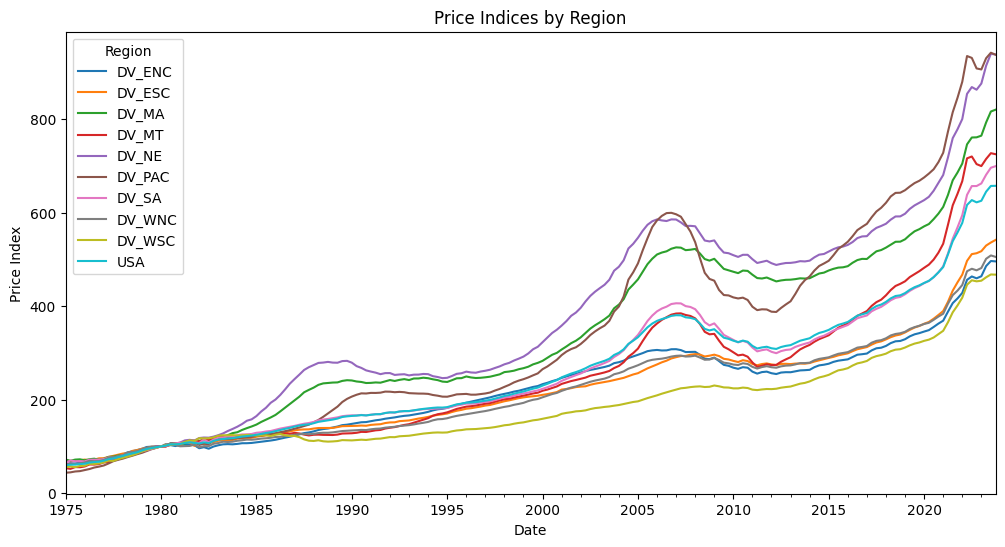

In [15]:
data.plot(figsize=(12, 6))
plt.title('Price Indices by Region')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend(title='Region')
plt.show()

The graph presents the progression of price indices across different regions in the United States from 1975 to 2020. Overall, all regions exhibit an upward trend in price indices over the years, indicating a general increase in prices throughout the country.

However, the relative positions and trajectories of the price indices vary among the regions. Some regions, such as DV_PAC and DV_MT, consistently maintain higher price indices compared to others, suggesting that these areas experienced relatively higher prices throughout the period. On the other hand, regions like DV_ENC and DV_WNC have comparatively lower price indices, indicating more affordable prices in these areas.

Interestingly, the overall USA price index, which represents the national average, falls in the middle of the regional indices. This suggests that while some regions may have higher or lower prices compared to the national average, the USA index captures the overall trend of rising prices across the country.

Looking at the graph more closely, a slight dip or slowdown in the price indices can be observed around 2008-2010. This period coincides with the housing market crisis and the broader economic recession, which likely had an impact on housing prices across the regions. However, the price indices seem to recover and resume their upward trajectory in the subsequent years.

The rate of change in price indices also varies among the regions. Some regions, such as DV_PAC and DV_MT, show steeper increases over time, indicating faster price appreciation. Other regions, like DV_ENC and DV_WNC, have more gradual increases, suggesting slower price growth.

After this we need to create a stacked area plot to visualize the composition of price indices

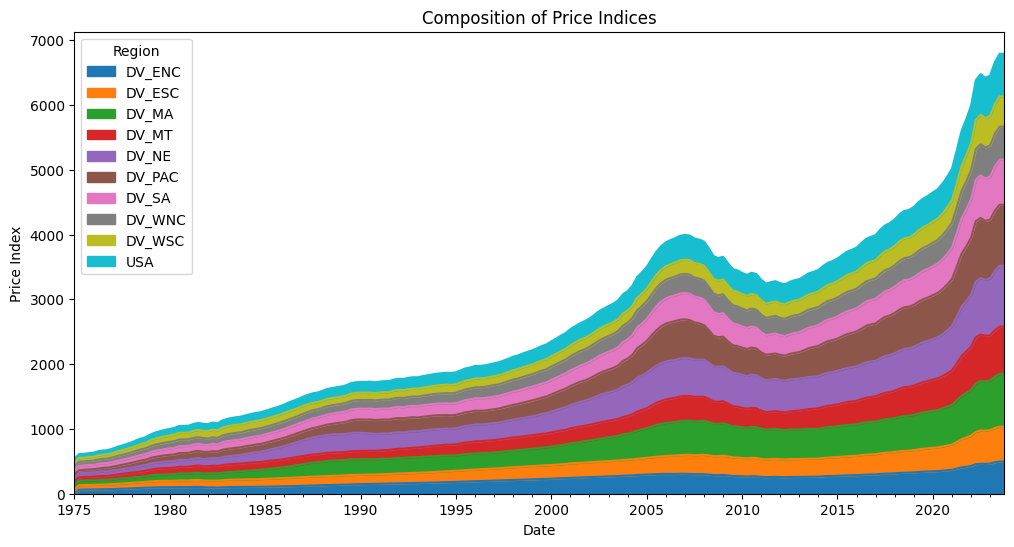

In [16]:
data.plot.area(figsize=(12, 6))
plt.title('Composition of Price Indices')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend(title='Region')
plt.show()

This graph depicts the composition of price indices for different regions, including various development regions (DV) and the USA as a whole, over time from 1975 to 2020.

A few key takeaways:
- The indices for all regions have grown significantly since 1975, rising from under 1000 to around 6000-7000 by 2020. This indicates substantial overall price inflation during this 45 year period.
- The USA line is the highest, showing that price levels for the country as a whole are higher than in the individual development regions shown.
- The different regions' price indices are stacked, which allows us to see their relative contribution to the total price level over time. 
- DV_ENC and DV_ESC make up the largest portions, followed by DV_MA. The smaller regions like DV_PAC, DV_SA, DV_WNC have narrower bands.
- The relative composition has shifted somewhat over time. DV_MA's share grew in the 80s and 90s before leveling off, while DV_MT expanded more in the 2000s and 2010s. Some regions' shares shrank comparaic alone.

After this we should analyze the distribution of price indices:

Create a histogram for each region

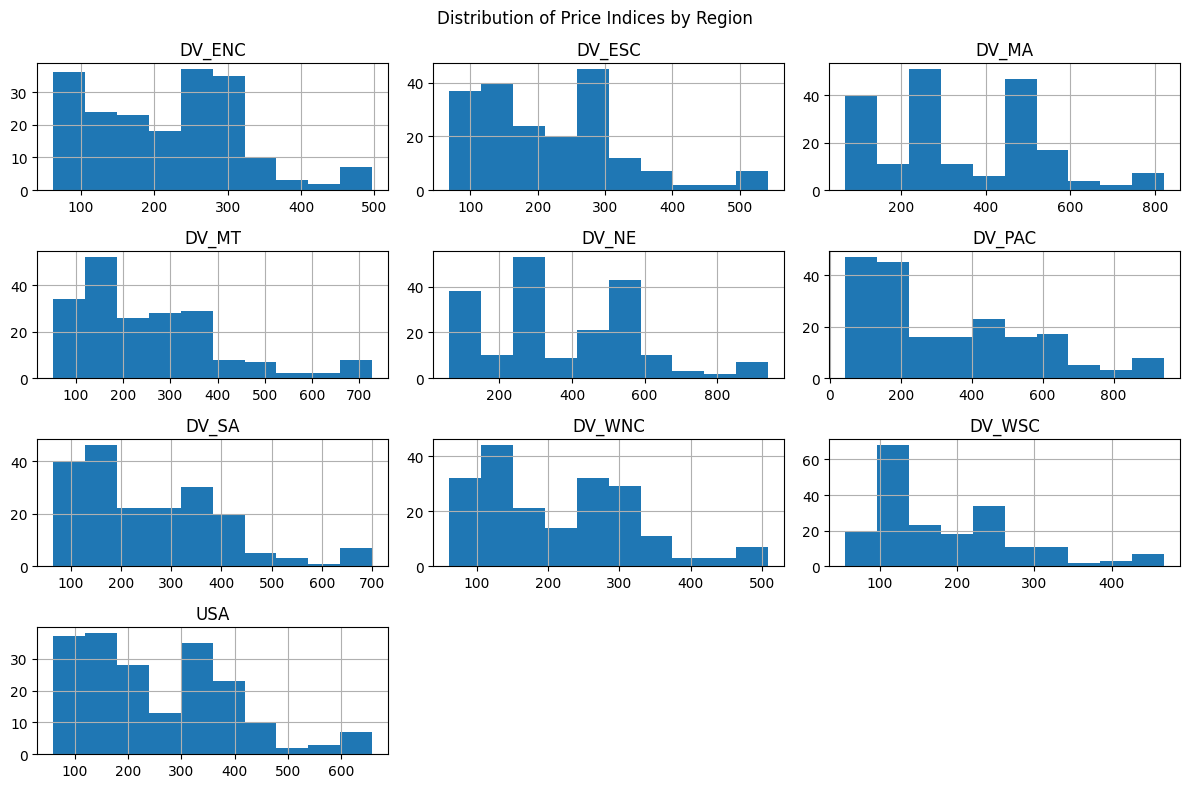

In [17]:
data.hist(figsize=(12, 8))
plt.suptitle('Distribution of Price Indices by Region')
plt.tight_layout()
plt.show()

Create a box plot to compare the price indices across regions

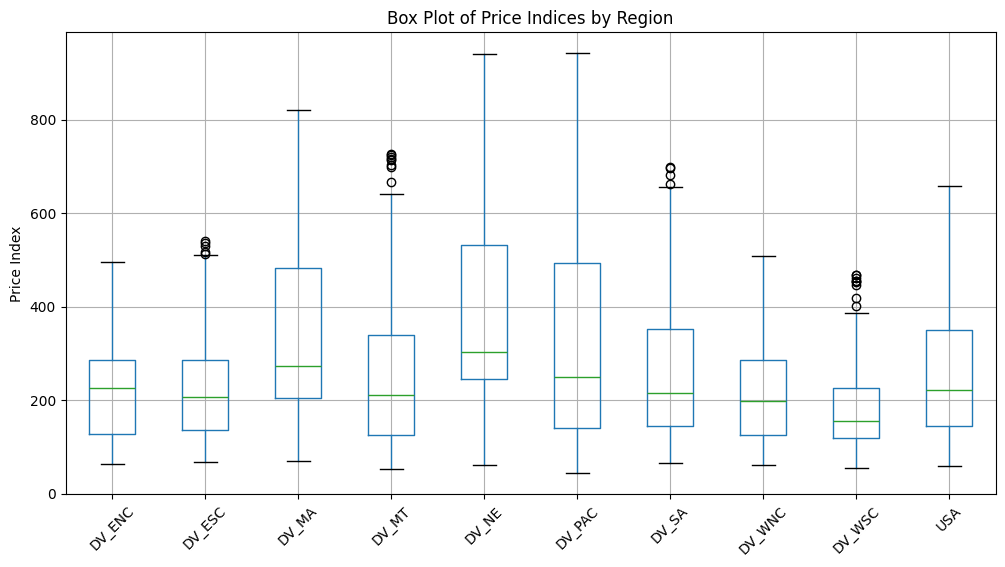

In [18]:
data.boxplot(figsize=(12, 6))
plt.title('Box Plot of Price Indices by Region')
plt.ylabel('Price Index')
plt.xticks(rotation=45)
plt.show()

Then we want to analyze the correlation between regions:

Calculate the correlation matrix

In [19]:
correlation_matrix = data.corr()
display(correlation_matrix)

region,DV_ENC,DV_ESC,DV_MA,DV_MT,DV_NE,DV_PAC,DV_SA,DV_WNC,DV_WSC,USA
region,,,,,,,,,,
DV_ENC,1.000000,0.985335,0.979600,0.967669,0.981605,0.972274,0.981652,0.989318,0.946728,0.986736
DV_ESC,0.985335,1.000000,0.984145,0.988050,0.981545,0.981538,0.992966,0.996749,0.983760,0.996202
DV_MA,0.979600,0.984145,1.000000,0.963937,0.997092,0.981883,0.986338,0.988094,0.953571,0.989853
DV_MT,0.967669,0.988050,0.963937,1.000000,0.963433,0.988115,0.992464,0.985065,0.987995,0.990809
DV_NE,0.981605,0.981545,0.997092,0.963433,1.000000,0.980715,0.986436,0.986407,0.950220,0.988988
DV_PAC,0.972274,0.981538,0.981883,0.988115,0.980715,1.000000,0.993273,0.986675,0.971929,0.993687
DV_SA,0.981652,0.992966,0.986338,0.992464,0.986436,0.993273,1.000000,0.992128,0.977065,0.998068
DV_WNC,0.989318,0.996749,0.988094,0.985065,0.986407,0.986675,0.992128,1.000000,0.979120,0.997351
DV_WSC,0.946728,0.983760,0.953571,0.987995,0.950220,0.971929,0.977065,0.979120,1.000000,0.980118


Visualize the correlation matrix using a heatmap

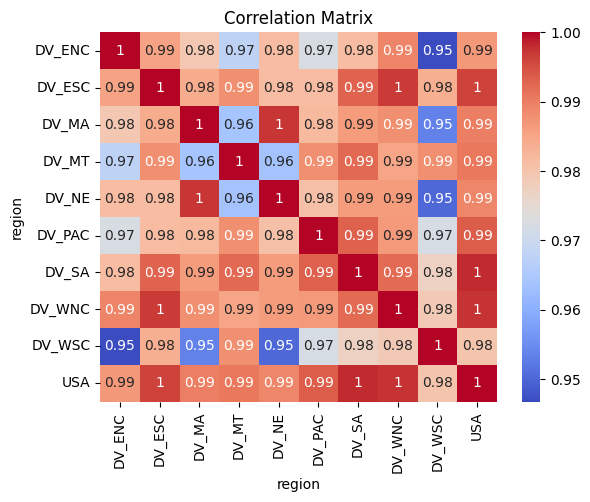

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix displayed, we can make the following observations and analysis:

- The matrix shows very high positive correlations, mostly above 0.95, between all pairs of regions, including the national index ('USA'). This indicates that the price indexes across different regions tend to move in the same direction, suggesting a strong relationship and interdependence between regional real estate markets.

- The highest correlations of 1.0 are observed between certain pairs of regions, such as 'DV_ENC' and itself, 'DV_ESC' and 'DV_WNC', and 'USA' with 'DV_SA' and 'DV_WNC'. This suggests that these pairs of regions have nearly identical price index movements over the time period analyzed.

- While most correlations are very high, the relatively lowest correlations are observed between 'DV_WSC' and other regions, ranging from 0.95 to 0.98. This could indicate that the real estate market dynamics in the 'DV_WSC' region may differ slightly from other regions, although the correlations are still quite high.

- The overall pattern of high positive correlations suggests a strong integration and synchronization of real estate markets across different regions within the broader national market. This could be due to factors like economic conditions, interest rates, population movements, or investor behavior affecting the entire housing market in a similar manner.

- From an investment perspective, the high correlations imply that there may be limited opportunities for diversification within the real estate market by investing in different regions, as the price movements are highly correlated. Diversification may need to be sought by investing in other asset classes or alternative investments with lower correlations to real estate.


And lastly we need to analyze the percentage change in price indices:

Calculate the percentage change from the previous quarter

In [21]:
data_pct_change = data.pct_change().dropna()

Visualize the percentage change using a line plot

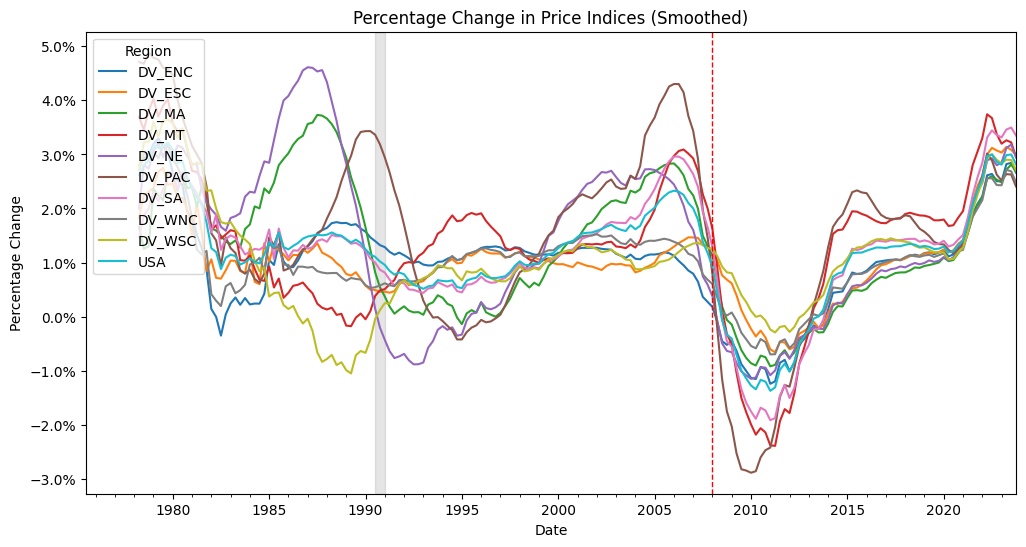

In [22]:
# Apply a rolling average to smooth the lines (adjust the window size as needed)
window_size = 12  # Example: 12-month rolling average
data_pct_change_smooth = data_pct_change.rolling(window=window_size).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
data_pct_change_smooth.plot(ax=ax)

# Customize the y-axis labels to display percentage values
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1))


# Adjust legend placement and font size
plt.legend(title='Region', loc='upper left', fontsize='medium')

# Add vertical lines or shaded regions for specific events or time periods
plt.axvline(x='2008-01-01', color='red', linestyle='--', linewidth=1, label='Financial Crisis')
plt.axvspan('1990-07-01', '1991-03-01', color='gray', alpha=0.2, label='Recession')

# Set the title and labels
plt.title('Percentage Change in Price Indices (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

plt.show()

- The graph displays a cyclical pattern in the price indices, with periods of growth followed by periods of decline or stagnation. This cyclical behavior is expected and aligns with the cyclical nature of real estate markets and economic conditions.

- Impact of Recessions
1. 1990 Recession: Around the time of the 1990 recession (indicated by the gray vertical line), there is a notable downturn in the percentage change of price indices across most regions. This suggests that the 1990 recession had a significant impact on real estate values, leading to a period of declining or stagnant prices.
2.  2008 Financial Crisis: The red vertical line marks the 2008 financial crisis, and it is evident that this event had a more pronounced and prolonged impact on the real estate market. Following the crisis, there is a sharp and extended decline in the percentage change of price indices, indicating a severe downturn in real estate values across all regions.

- While the overall patterns are similar, there are noticeable regional variations in the magnitude and timing of price changes. For example, some regions like DV_PAC (likely the Pacific region) experienced steeper declines during the 2008 crisis compared to others.

- After each major downturn, the graph shows a period of recovery, where the percentage change in price indices becomes positive again, indicating a rebound in real estate values. However, the pace and strength of recovery vary across regions.

- In the most recent years, the graph shows a sustained period of positive price changes across all regions, suggesting a strong real estate market with rising values. However, it's important to note that this data may not capture the most recent market conditions or potential changes.


## Hypothesis Testing and Machine Learning

Based on the insights gained from exploratory analysis, we will formulate specific hypotheses related to the housing crisis and test them using statistical methods. Additionally, we will employ machine learning algorithms to build predictive models and identify key factors driving house price changes during the crisis period.

Test if there is a significant difference in price indices between two regions. In this example we are seeing the difference between DV_WNC and DV_ESC.

In [23]:
region1 = 'DV_WNC'
region2 = 'DV_ESC'
_, p_value = stats.ttest_ind(data[region1], data[region2])
print(f"P-value: {p_value}")

P-value: 0.6749800358768302


Given the p-value of 0.6749800358768302, which is greater than the commonly used significance levels (e.g., 0.05), we fail to reject the null hypothesis. This means that based on the data and the chosen significance level, there is insufficient evidence to conclude that the mean price indices of the 'DV_WNC' and 'DV_ESC' regions are significantly different.
In other words, the high p-value suggests that the observed difference in means between the two regions could be due to random chance or sampling variability, rather than a statistically significant difference in the underlying populations.

Predict price indices using linear regression

In [24]:
X = data[['DV_ESC', 'DV_MA', 'DV_PAC', 'DV_NE', 'DV_WNC']]  # Include relevant regional indexes and other features
y = data['USA'].values  # Using the USA price index as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.0890735450944837


The relatively low MSE value of 3.0890735450944837 indicates that the regional price indexes have substantial predictive power in estimating the national price index. This highlights the importance of monitoring the regional market data to understand and forecast national real estate trends accurately.

This is another way of doing a linear regression through Principle Component Analysis (PCA) which is very helpful for noise reduction and interpreting your results:

In [25]:
X = data[['DV_ESC', 'DV_MA', 'DV_PAC', 'DV_SA']]
y = data['USA']

pca = PCA()
X_pca = pca.fit_transform(X)

model_pcr = LinearRegression().fit(X_pca, y)

# Print the coefficients
print("Coefficients:")
print(model_pcr.coef_)

# Print the intercept
print("Intercept:")
print(model_pcr.intercept_)

# Print the R-squared value
print("R-squared:")
print(model_pcr.score(X_pca, y))

Coefficients:
[ 0.40746002  0.01482922  0.39633936 -0.27739492]
Intercept:
255.8867857142857
R-squared:
0.9996755191338285


In [26]:
X = data[['DV_WNC', 'DV_ESC', 'DV_NE', 'DV_PAC']] # Select relevant regional indexes as features
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_
display(labels)

centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Cluster Centroids:
Cluster 0: [319.49527778 316.78111111 583.35722222 602.64555556]
Cluster 1: [158.56508197 168.03721311 272.15180328 210.1647541 ]
Cluster 2: [267.80116279 267.19023256 489.08744186 414.17697674]
Cluster 3: [467.02636364 491.75454545 846.74727273 891.74727273]
Cluster 4: [ 94.69888889  98.18688889 109.09977778  93.06022222]


the characteristics of the clusters based on the centroids are:
Cluster 0: This cluster has relatively low mean price indexes across all four regions, suggesting that it represents areas with lower real estate values or potentially an earlier time period in the data.
Cluster 1: The centroids for this cluster show moderately high mean price indexes, with the highest values observed for the 'DV_PAC' and 'DV_NE' regions.
Cluster 2: This cluster exhibits the highest mean price indexes among all clusters, particularly for the 'DV_NE' and 'DV_PAC' regions, indicating areas with high real estate values or potentially a more recent time period.
Cluster 3: The centroids for this cluster show a mixed pattern, with relatively high mean price indexes for 'DV_ESC' and 'DV_NE', but lower values for 'DV_PAC' and 'DV_WNC'.
Cluster 4: This cluster has moderate mean price indexes across all regions, with values falling between the extremes of Clusters 0 and 2.

In [27]:
X = data[['DV_WNC', 'DV_ESC', 'DV_NE', 'DV_PAC', 'DV_MA']]
y = data['USA']
estimator = Ridge()
selector = RFE(estimator, n_features_to_select=5)
selector.fit(X, y)
selected_features = X.columns[selector.support_]
display(selected_features)

Index(['DV_WNC', 'DV_ESC', 'DV_NE', 'DV_PAC', 'DV_MA'], dtype='object', name='region')

The output shows that all five regional price indexes ('DV_WNC', 'DV_ESC', 'DV_NE', 'DV_PAC', and 'DV_MA') were selected by the RFE process as the most important features for predicting our target variable 'USA'.

## Generating Insights and Conclusions

Finally, we will summarize our findings, draw meaningful conclusions, and provide actionable insights. We will discuss the implications of our analysis for policymaking, risk assessment, and future housing market stability. 

To preface, a housing index is a statistic based on the idea where the higher the price index the more expensive it is to buy a house and the lower it is the more cheap it is to buy a house. While the idea that having a lower price index might be good, this usually means that the overall economy is in bad shape like it the economy of the general area is facing a recession and the market for buying houses is at a low.

Looking at the longer perspective of time, the housing market's price indicies have followed an overall increasing pattern indicating a positive housing market in the long run of time, but has incurred a lot of dip during certain periods of time. These dips are clearly based from certain events and we do observe more into the 2008 recession era as it was recent, but around the time in 1995 also has another current event that led lower price indicies and that was because federal funding rates had increased at this time period meaning mortgage rates increase would also follow.

With this data provided, we can observe what events can have a butterfly effect on mortgage based issues. A lot of leading historical factors that were similar during 1995 and 2008 was government based factors with manipulation of federal reserve loans percentage and allowing people who were not financially well equipped to take on loans have caused a lot of decreasing of price indicies. 

Overall, we can use this data and analysis to provide insights to the U.S decision makers, especially ones focused on fiscal and financial decisions. Combining historical moments and using data to prove correlation and effects from certain decisions made at the time can help push policy makers into a direction where we can ultimately try to avoid these economical financial decisions and laws.

If we were to extend research in other aspects that were more specific towards the economic downturns of price indicies such as the time periods of 1995 and 2008, we would be able to observe other more specific reasons of the two events that can prove certain factors that caused their respective depressions of finance factors. We could also share this research to other organizations who observe the overall economy of the United States and see one of the many outlets affected by changes in economy flow.

Relevant Links:

https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx (Main site for the gathered data)

https://www.investopedia.com/terms/h/house-price-index-hpi.asp (Housing price index definition with further detail)

https://en.wikipedia.org/wiki/Subprime_mortgage_crisis (The 2008 housing market recession)

https://www.cutimes.com/2018/12/14/trouble-in-housing-looks-more-like-1994-than-2007 (details of 1995 housing market)
